#### 
- seaborn lineplot 또는 matplotlib plot 활용
- x축: 시점, y축 : 서울 의사

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [107]:
pd_data = pd.read_csv('시도별_의료인력_현황_20230416213554_dl1.csv', encoding='cp949', header=[0,1,2])

pd_data.set_index(('시도별(1)','시도별(1)', '시도별(1)'), inplace=True)

pd_data.index.name = '지역별'

# pd_data = pd_data.stack(level=0)
# pd_data = pd_data.unstack(level=0)
# pd_data = pd_data.stack(level=0)
# pd_data = pd_data.stack(level=0)
# pd_data = pd_data.unstack(level=1)
# pd_data = pd_data.unstack(level=1)

pd_data = pd_data.stack(level=0)
pd_data = pd_data.unstack(level=0)

pd_data = pd_data.swaplevel(1,2, axis=1)
pd_data = pd_data.swaplevel(0,1, axis=1)

pd_data.index.name = '시점'

pd_data

지역별,광주,대구,대전,부산,서울,울산,인천,광주,대구,대전,...,서울,울산,인천,광주,대구,대전,부산,서울,울산,인천
,간호사,간호사,간호사,간호사,간호사,간호사,간호사,의사,의사,의사,...,의사,의사,의사,의사,의사,의사,의사,의사,의사,의사
,소계,소계,소계,소계,소계,소계,소계,일반의,일반의,일반의,...,일반의,일반의,일반의,전문의,전문의,전문의,전문의,전문의,전문의,전문의
시점,,,,,,,,,,,,,,,,,,,,,
2010,4538,6143,3874,9268,28634,2192,4364,91,138,149,...,934,110,193,2024,3370,2136,4698,16102,1055,2511
2011,5159,6458,4056,10144,29804,2390,4689,135,152,168,...,1067,120,240,2225,3634,2248,5167,17816,1163,2797
2012,5123,6458,4127,10212,31194,2410,4815,128,135,159,...,863,103,213,2351,3814,2395,5369,18667,1211,2951
2013,5430,8189,4570,11547,35179,2950,5476,119,142,158,...,863,100,207,2451,3941,2477,5631,19423,1252,3142
2014,6147,8502,4709,12660,37660,3214,6500,130,139,158,...,848,110,213,2572,4023,2566,5822,19953,1298,3347
2015,6679,9005,5034,13782,39759,3362,7450,139,142,159,...,837,114,201,2686,4174,2647,6021,20361,1380,3548
2016,7192,9920,5788,15494,45291,3863,8822,152,159,161,...,938,113,207,2785,4350,2731,6196,21040,1442,3686


In [108]:
df1 = pd_data.loc[:,('서울','의사')]
df1['total'] = df1['일반의'] + df1['전문의']

df1

C:\Users\tpgns\AppData\Local\Temp\ipykernel_8008\3454914127.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = pd_data.loc[:,('서울','의사')]
C:\Users\tpgns\AppData\Local\Temp\ipykernel_8008\3454914127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total'] = df1['일반의'] + df1['전문의']


,일반의,전문의,total
시점,,,
2010,934,16102,17036
2011,1067,17816,18883
2012,863,18667,19530
2013,863,19423,20286
2014,848,19953,20801
2015,837,20361,21198
2016,938,21040,21978
2017,1014,21698,22712
2018,1124,22352,23476


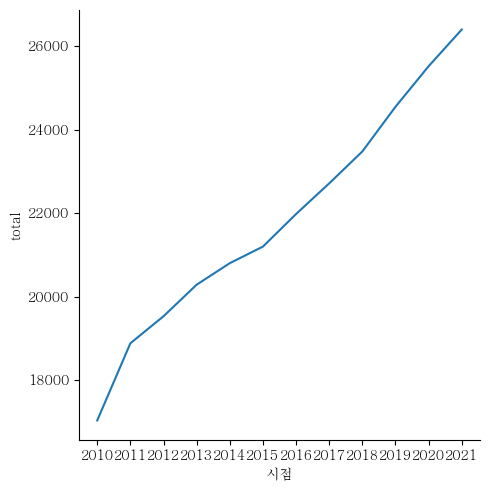

In [109]:
sns.relplot(data=df1, x='시점', y='total', kind='line')

C:\Users\tpgns\AppData\Local\Temp\ipykernel_8008\2933909468.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(df1.index, rotation=45)


[Text(0, 0, '2010'),
 Text(1, 0, '2011'),
 Text(2, 0, '2012'),
 Text(3, 0, '2013'),
 Text(4, 0, '2014'),
 Text(5, 0, '2015'),
 Text(6, 0, '2016'),
 Text(7, 0, '2017'),
 Text(8, 0, '2018'),
 Text(9, 0, '2019'),
 Text(10, 0, '2020'),
 Text(11, 0, '2021')]

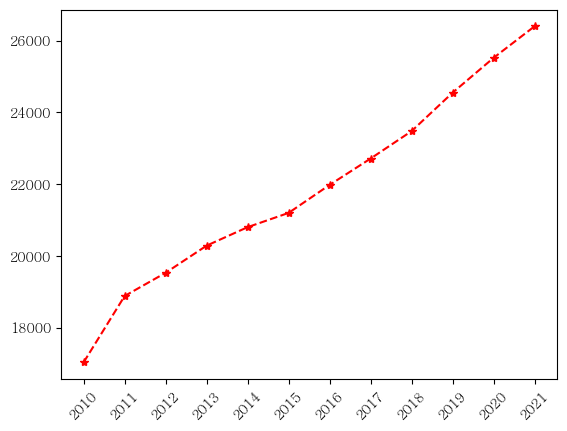

In [110]:
fig, axe = plt.subplots()

axe.plot(df1.index, df1['total'], 'r*--')
axe.set_xticklabels(df1.index, rotation=45)